In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# load the dataset....

In [2]:
data=pd.read_csv("data.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# find the null no of null values in each col...

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# find th statiscal measure...

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:>

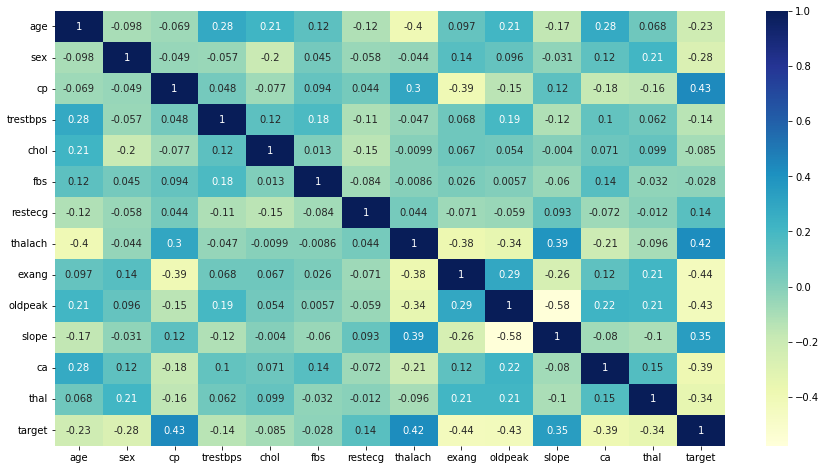

In [5]:
# Correlation information of variables
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

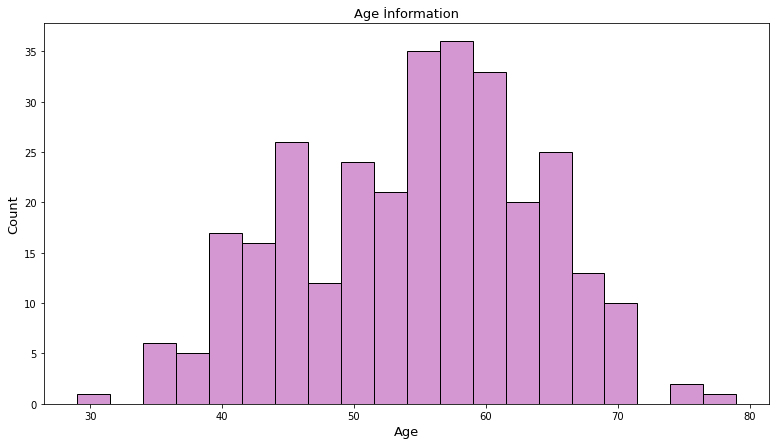

In [6]:
plt.figure(figsize=(13,7))
sns.histplot(data=data,x="age",color="#C875C4",binwidth=2.5,element="bars");
plt.title("Age İnformation",size=13)
plt.xlabel("Age",size=13);
plt.ylabel("Count",size=13);

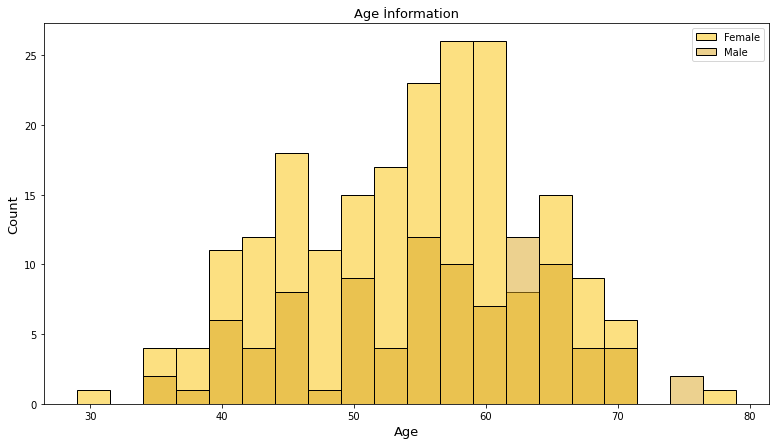

In [7]:
plt.figure(figsize=(13,7))
sns.histplot(data=data,x="age",hue="sex",palette=sns.color_palette(["#DAA520","#FAC205"]),binwidth=2.5,element="bars");
plt.legend(["Female","Male"])
plt.title("Age İnformation",size=13)
plt.xlabel("Age",size=13);
plt.ylabel("Count",size=13);
plt.show()

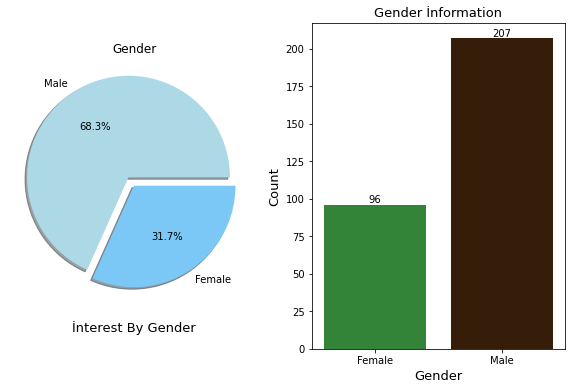

In [8]:
countgender=data[["sex"]].value_counts().reset_index(name="Count").replace({1:"Male",0:"Female"})
gender=countgender["sex"].tolist()
count=countgender["Count"].tolist()

plt.figure(figsize=(10,6))       # figure size decresing
plt.subplot(1,2,1)
explode=[0.1,0.0]
palette=sns.color_palette(["#ADD8E6","#7BC8F6"])
plt.pie(count,labels=gender,autopct="%1.1f%%",colors=palette,explode=explode,shadow=True)
plt.title("Gender")
plt.xlabel("İnterest By Gender",size=13)
#
plt.subplot(1,2,2)
ax=sns.countplot(data=data,x="sex",palette=sns.color_palette(["#26912E","#3D1C02"]));
for i in ax.containers:
    ax.bar_label(i)
plt.xticks([0,1],["Female","Male"]);
plt.title("Gender İnformation",size=13)
plt.xlabel("Gender",size=13);
plt.ylabel("Count",size=13);
plt.show()

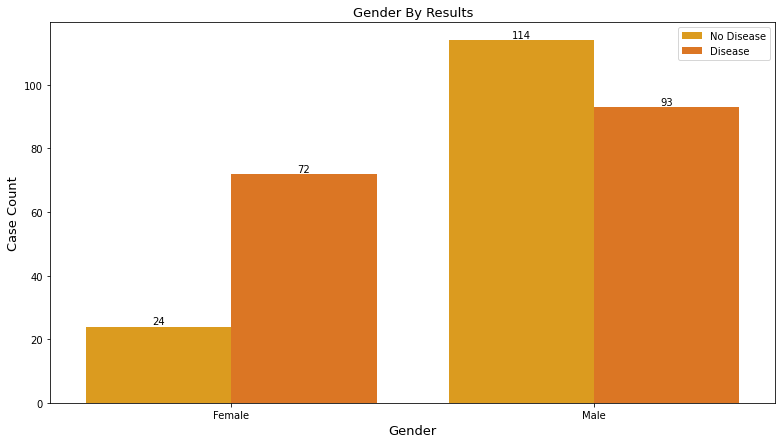

In [9]:
plt.figure(figsize=(13,7))
ax=sns.countplot(data=data,x="sex",hue="target",palette=sns.color_palette(["#FAA500","#F97306"]))
for i in ax.containers:
    ax.bar_label(i)
plt.legend(["No Disease","Disease"])
plt.xticks([0,1],["Female","Male"])
plt.title("Gender By Results",size=13)
plt.xlabel("Gender",size=13)
plt.ylabel("Case Count",size=13)
plt.show()

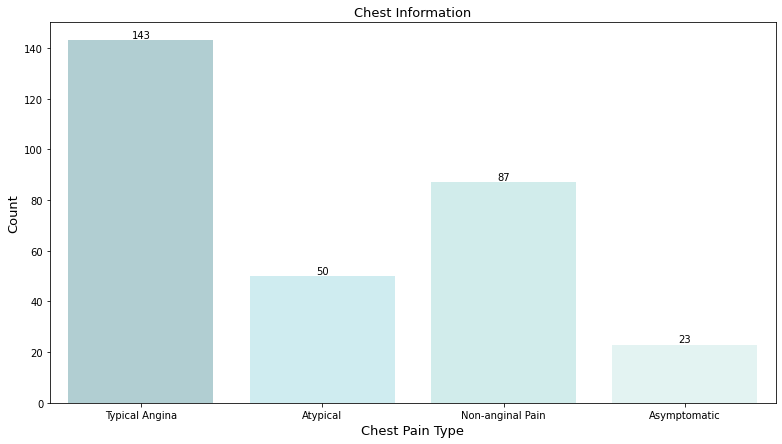

In [10]:
plt.figure(figsize=(13,7))
ax=sns.countplot(data=data,x="cp",palette=sns.color_palette(["#2F8F9D","#79DAE8","#82DBD8","#B3E8E5"]),alpha=0.4)
plt.xticks([0,1,2,3],["Typical Angina","Atypical","Non-anginal Pain","Asymptomatic"],size=10)
plt.title("Chest Information",size=13)
plt.xlabel("Chest Pain Type",size=13)
plt.ylabel("Count",size=13)
for i in ax.containers:
    ax.bar_label(i)

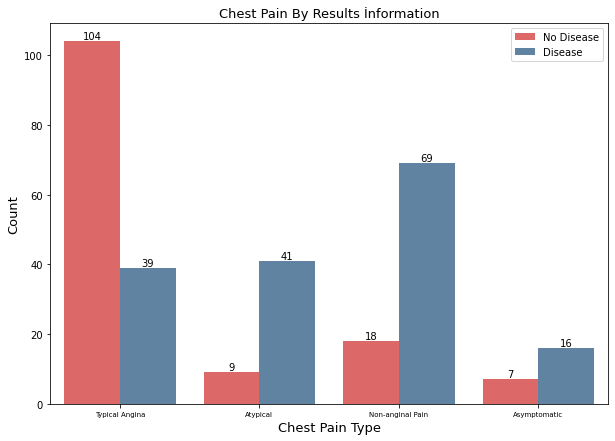

In [11]:
plt.figure(figsize=(10,7))
ax=sns.countplot(data=data,x="cp",hue="target",palette=sns.color_palette(["#F05454","#5584AC"]))
plt.legend(["No Disease","Disease"])
plt.xticks([0,1,2,3],["Typical Angina","Atypical","Non-anginal Pain","Asymptomatic"],size=7)
plt.title("Chest Pain By Results İnformation",size=13)
plt.xlabel("Chest Pain Type",size=13)
plt.ylabel("Count",size=13)
for i in ax.containers:
    ax.bar_label(i)

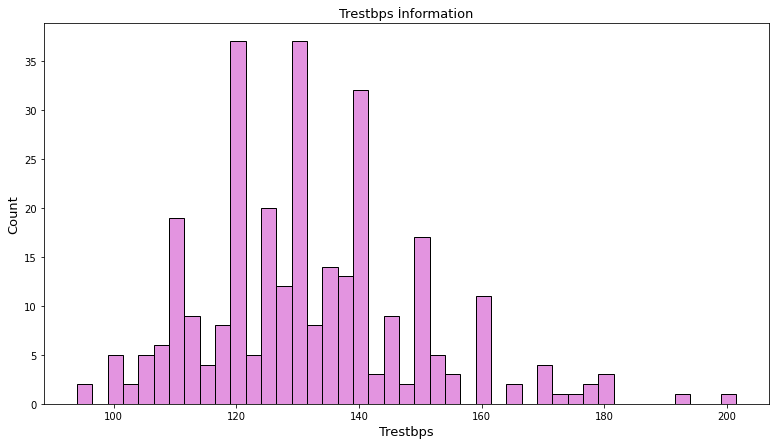

In [12]:
plt.figure(figsize=(13,7))
sns.histplot(data=data,x="trestbps",color="#DA70D6",binwidth=2.5,element="bars");
plt.title("Trestbps İnformation",size=13)
plt.xlabel("Trestbps",size=13);
plt.ylabel("Count",size=13);

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


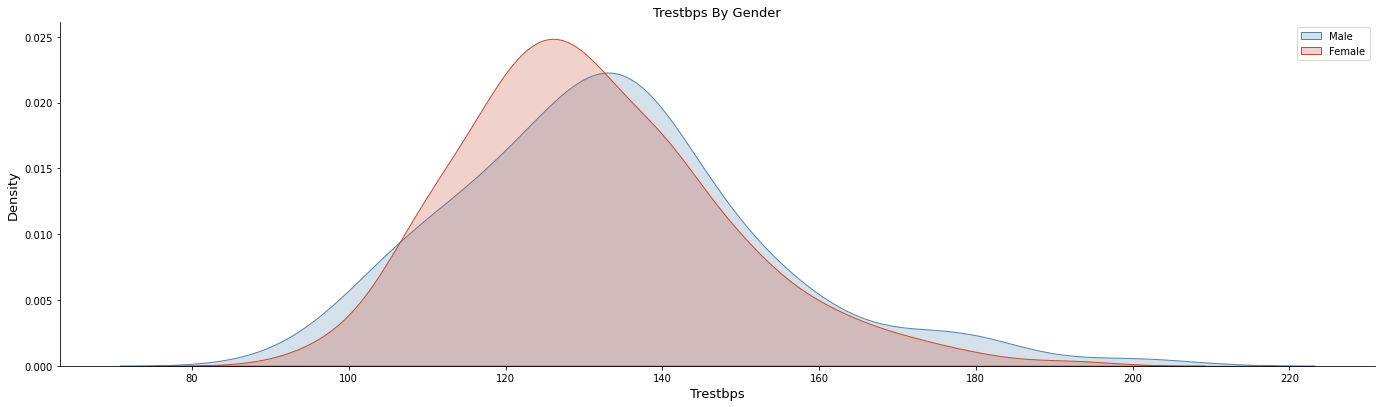

In [13]:
sns.FacetGrid(data=data,hue="sex",height=5.5, aspect=3.5,palette=sns.color_palette(["#5584AC","#C84B31"])).map(sns.kdeplot,
                                                                                   "trestbps",
                                                                                       shade="True")
plt.legend(["Male","Female"])
plt.title("Trestbps By Gender",size=13)
plt.xlabel("Trestbps",size=13)
plt.ylabel("Density",size=13)
plt.show()

In [14]:
data.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

In [15]:
data['trestbps']=np.log(data['trestbps'])
data['chol']=np.log(data['chol'])
data['thalach']=np.log(data['thalach'])

np.var(data[["trestbps",'chol','thalach']])

trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

In [16]:
X=data.drop("target",axis=1)
y=data["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [17]:
def accuracy_(y,predict):
    accuracy=accuracy_score(y,predict)
    return accuracy

In [18]:
#models=pd.DataFrame(columns=["Model","Accuracy Score","Cross Validation"])

# Apply logistic regresssion technique...

In [19]:


accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

acc=accuracy_score(y_test,y_pred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")




Training accuracy score of the model is: 85.37735849056604 %
Testing accuracy score of the model is: 79.12087912087912 %


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# apply randomForestclassifier..

In [20]:


from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)

y_pred1 = knn.predict(X_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['KNN']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")




Training accuracy score of the model is: 85.84905660377359 %
Testing accuracy score of the model is: 75.82417582417582 %


# On applying svm model

In [21]:
from sklearn import svm
sv_model= svm.SVC(kernel='linear')
sv_model.fit(X_train, y_train)
pred=sv_model.predict(X_test)
svm_aucscore=accuracy_(y_test,pred)
print("-"*60)
print("SVM Accuracy Score: ",svm_aucscore)
print("-"*60)



------------------------------------------------------------
SVM Accuracy Score:  0.8241758241758241
------------------------------------------------------------


# Applying Naive Bayes ...

In [22]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB().fit(X_train,y_train)
pred=nb_model.predict(X_test)
navieBayes_aucscore=accuracy_(y_test,pred)
print("-"*60)
print("navie bayes Accuracy Score:: ",navieBayes_aucscore)
print("-"*60)




------------------------------------------------------------
navie bayes Accuracy Score::  0.8131868131868132
------------------------------------------------------------


In [23]:
data['target'].value_counts()


1    165
0    138
Name: target, dtype: int64

# on applying XGBClassifier

In [24]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train, y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)


Accuracy score of training data :  1.0
Accuracy score of test data :  0.8021978021978022


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
pred=knn.predict(X_test)
navieBayes_aucscore=accuracy_(y_test,pred)
print("-"*60)
print("KNN accurancy score : ",navieBayes_aucscore)
print("-"*60)

------------------------------------------------------------
KNN accurancy score :  0.7252747252747253
------------------------------------------------------------
